# SEP 740 - Assignment 1

In this assignment, you will work on solving a common type of problem in deep learning: _Classificaion_

We will solve the MNIST classification task. The MNIST dataset is a widely used dataset for image recognition and classification tasks. It consists of a training set of 60,000 28x28 grayscale images of handwritten digits (0-9) and a test set of 10,000 images. Each image is labeled with the corresponding digit it represents. The dataset is commonly used as a benchmark for image recognition and classification algorithms and has been widely used in machine learning and computer vision research.

# MNIST Classification Task

### Import Libraries and Load the dataset

In [37]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random
import tensorflow as tf
from tensorflow import keras                     

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.utils.np_utils import to_categorical

from tensorflow.keras.datasets import mnist

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")
print('Samples in the training set:', x_train.shape[0])
print('Samples in the test set:', y_test.shape[0])

Samples in the training set: 60000
Samples in the test set: 10000


### An example of the MNIST training set

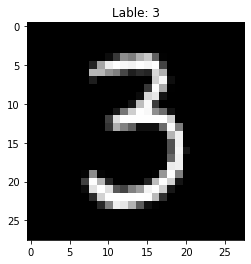

In [5]:
from matplotlib import pyplot as plt
sample_id = 50
plt.imshow(x_train[sample_id], cmap='gray')
plt.title(f'Lable: {y_train[sample_id]}')
plt.show()

## Pre-processing

### Reshape each sample of the dataset to a 1D array **[10 Points]**
The shape of each sample in the dataset is (28, 28). To feed this data to a fully connected classifier we need to have a one-dimensional array for each sample.

In [39]:
# TODO: Convert samples in the training and test sets to 1D array

#Reshaping Data (28*28 into a 1D array of 784 elements)
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

#Converting data points to float so we can normalize it
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

#Normalizing the data between 0 and 1
x_train /= 255                        
x_test /= 255

#Converting the labels into one-hot encoded vector because they are categorical data

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Split the training dataset **[10 Points]**
A common method for ensuring the generalization of the model is to split the training dataset two chucks, **train** and **validation**.

In [40]:
# TODO: Split the training set into training and validation

#Doing a 90:10 split for Train Validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.10)

## Design your model **[20 Points]**
Design a neural network model for the MNIST classification task.

In [41]:
# TODO: Design the architecture of the model

# Adding 2 hidden layers of 512 perceptrons each having activation as ReLU and the output layer having activation as softmax and 10 perceptrons signifying 10 output possibilities.
def build_model():
    model = keras.Sequential([
                        Dense(512, activation = tf.nn.relu, input_shape = [len(x_train[0])]),
                        Dense(512, activation = tf.nn.relu),
                        Dense(10, activation = tf.nn.softmax)
    ])

    #categorical Crossentropy is good for comparing 2 probability distributions
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## Train your model **[20 Points]**
Use the training set to train the model and use the validation set to monitor the traning process. Make sure to use an appropriate loss function considering your task (classification) and model architecure.

In [42]:
# TODO: Fit the model to the traning set

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=100, verbose=1, validation_data = (x_val, y_val), batch_size = 128, callbacks=[early_stop])

hist = pd.DataFrame(history.history)

Epoch 1/100
422/422 [==============================] - 6s 13ms/step - loss: 0.2283 - accuracy: 0.9331 - val_loss: 0.1224 - val_accuracy: 0.9612
Epoch 2/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0944 - val_accuracy: 0.9690
Epoch 3/100
422/422 [==============================] - 5s 13ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0889 - val_accuracy: 0.9720
Epoch 4/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0918 - val_accuracy: 0.9745
Epoch 5/100
422/422 [==============================] - 5s 12ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0753 - val_accuracy: 0.9783
Epoch 6/100
422/422 [==============================] - 5s 12ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0795 - val_accuracy: 0.9795
Epoch 7/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.0945 - val_accuracy:

## Plot the loss **[10 Points]**
Plot the trend of training loss and validation loss with respect to epochs. You should use visualization libraries (e.g. `matplotlib`, `seaborn`) to show these plots.

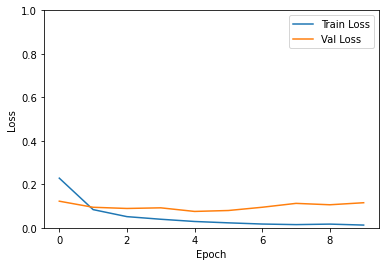

In [44]:
# TODO: Plot training history of the model

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['loss'], label='Train Loss')
    plt.plot(hist['val_loss'], label='Val Loss')
    plt.legend()
    plt.ylim([0, 1])

plot_history()


## Question: Analyzing train/validation loss plot **[10 Points]**
In a training scenario, assume that the curves of training loss and validation loss are diverging. What could be the problem?

If the Training Loss and Validation loss curves are diverging then it means that the model is overfitting. This can happen if the model is trined for too many epochs which led to perform excellent on ther training data but perform poorly on the validation data. Some techniques to solve this could be to reduce the parameters of introduce early stopping.  

## Test the model on the test set **[10 Points]**
Compute accuracy, F1 macro, precision, and recall scores of the model. You can use functions available in machine learning libraries such as `scikit-learn` to compute these metrics.

In [45]:
# TODO: Model evaluation and metrics

#Using the model to predict our test data
predictions = model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)

print('Accuracy: {}'.format(accuracy))

precision, recall, fscore, support = score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

for i in range(9):
  print('Class {}'.format(i))
  print('precision: {}'.format(precision[i]))
  print('recall: {}'.format(recall[i]))
  print('fscore: {}'.format(fscore[i]))


313/313 [==============================] - 1s 4ms/step - loss: 0.0988 - accuracy: 0.9768
Accuracy: 0.9768000245094299
Class 0
precision: 0.9681908548707754
recall: 0.9938775510204082
fscore: 0.9808660624370593
Class 1
precision: 0.9740484429065744
recall: 0.9920704845814978
fscore: 0.982976865997381
Class 2
precision: 0.971953578336557
recall: 0.9738372093023255
fscore: 0.9728944820909969
Class 3
precision: 0.9848790322580645
recall: 0.9673267326732673
fscore: 0.976023976023976
Class 4
precision: 0.9866117404737385
recall: 0.9755600814663951
fscore: 0.9810547875064004
Class 5
precision: 0.9852774631936579
recall: 0.9753363228699552
fscore: 0.980281690140845
Class 6
precision: 0.9762150982419855
recall: 0.9853862212943633
fscore: 0.9807792207792208
Class 7
precision: 0.9773622047244095
recall: 0.9659533073929961
fscore: 0.9716242661448141
Class 8
precision: 0.975991649269311
recall: 0.9599589322381931
fscore: 0.9679089026915114


## Plot test set digits **[10 Points]**
Plot a few examples of the digits in the test set with their true and predicted labels.

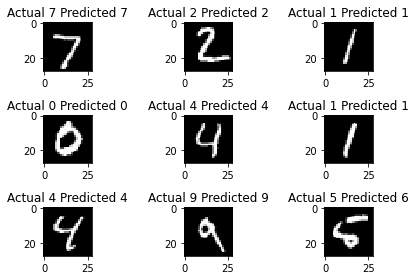

In [46]:
# TODO: Plot test digits and their labels

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Actual {} Predicted {}".format(np.argmax(y_test[i]),np.argmax(predictions[i])))
    
plt.tight_layout()

## Hype-parameter tuning **[Extra 20 points]**
Using grid search, try to find the best set of hyper-parameters for the model architecture and training the model.

Hyper-parameters include but are not limited to:

*   Number of layers
*   Number of perceptrons in each layer
*   Learning rate
*   Dropout rate

In [47]:
# TODO: Hyperparameter tuning using grid search

from tensorflow.keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#Have to fetch and reshape manupulate data again because the above data is already split.

(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

x_train /= 255                        
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def model_building(perceptrons, learning_rate, dropout_rate):
  model = keras.Sequential()
  model.add(Dense(perceptrons, activation='relu', input_shape=[len(x_train[0])]))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

param_grid = {'perceptrons': [32, 64, 128],'learning_rate': [0.01, 0.001], 'dropout_rate': [0.0, 0.1, 0.2]}

g_model = KerasClassifier(build_fn=model_building, verbose=1)
grid_cv = GridSearchCV(estimator=g_model, param_grid=param_grid, cv=2)
results = grid_cv.fit(x_train, y_train)
print("The best Parameters are: {}".format(grid_cv.best_params_))

<ipython-input-47-72e41eb8eb48>:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  g_model = KerasClassifier(build_fn=model_building, verbose=1)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2391 - accuracy: 0.9302
The best Parameters are: {'dropout_rate': 0.0, 'learning_rate': 0.01, 'perceptrons': 128}
